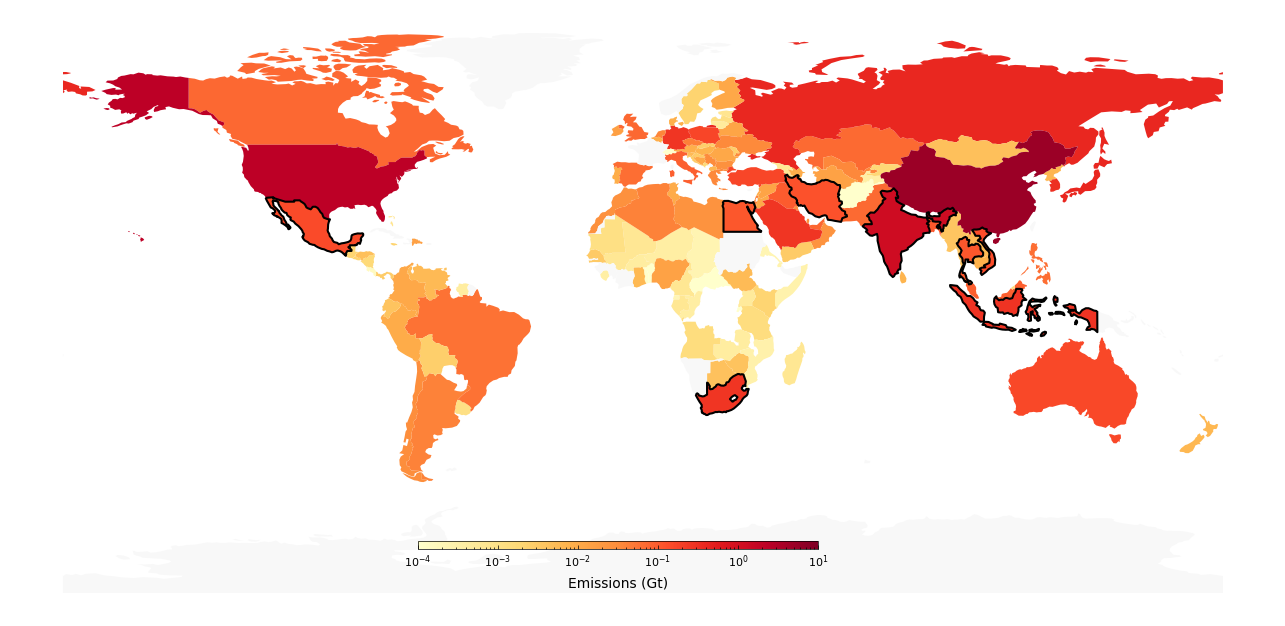

In [87]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import pycountry
from matplotlib.colors import LogNorm

# Load world map
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")

# Load emissions data
df_emissions = pd.read_excel('/Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/Excel sheets/jupyter To Do 8 and 9 .xlsx', 
                          sheet_name='Emi Cap all countries')

# Create ISO code mapping
iso_dict = {country.alpha_2: country.alpha_3 
          for country in pycountry.countries 
          if hasattr(country, 'alpha_2') and hasattr(country, 'alpha_3')}

df_emissions['iso3'] = df_emissions['asset_location'].map(iso_dict)

# Merge data
world = world.merge(df_emissions[['iso3', 'tot_emissions [Gt]']], 
                  how='left',
                  left_on='ISO_A3',
                  right_on='iso3')


# Create figure
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Plot base map
im = world.plot(column='tot_emissions [Gt]',
               ax=ax,
               legend=False,
               missing_kwds={'color': '#f8f8f8'},
               cmap='YlOrRd',
               norm=LogNorm(vmin=0.0001, vmax=10))

# Add borders for specific countries
highlight_countries = ['IND', 'IDN', 'ZAF', 'MEX', 'VNM', 'IRN', 'THA', 'EGY']
world[world['ISO_A3'].isin(highlight_countries)].boundary.plot(
   ax=ax, 
   color='black',
   linewidth=1.5
)
# Add colorbar with proper logarithmic spacing
cbar_ax = fig.add_axes([0.4, 0.2, 0.2, 0.01])
norm = LogNorm(vmin=0.0001, vmax=10)
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=norm)
cbar = plt.colorbar(sm,
                   cax=cbar_ax,
                   orientation='horizontal')
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_xlabel('Emissions (Gt)', fontsize=10)

ax.axis('off')
plt.show()

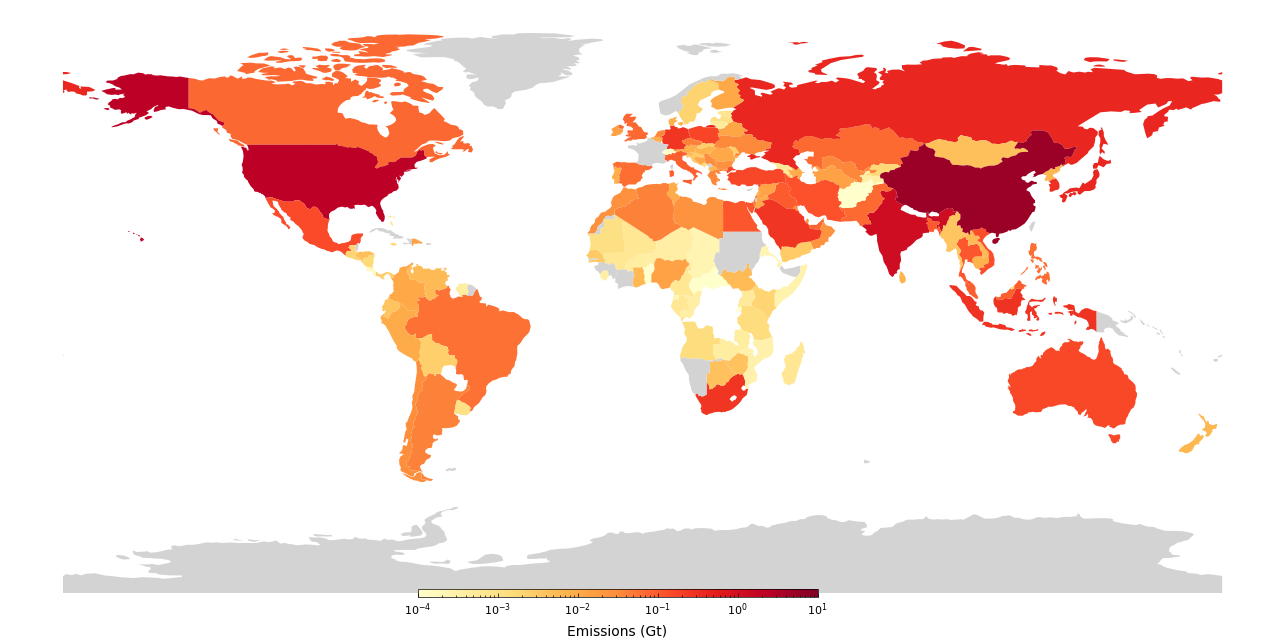

In [71]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import pycountry
from matplotlib.colors import LogNorm

world = gpd.read_file(
    "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
)

df_emissions = pd.read_excel('/Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/Excel sheets/jupyter To Do 8 and 9 .xlsx', 
                           sheet_name='Emi Cap all countries')

iso_dict = {country.alpha_2: country.alpha_3 
           for country in pycountry.countries 
           if hasattr(country, 'alpha_2') and hasattr(country, 'alpha_3')}

df_emissions['iso3'] = df_emissions['asset_location'].map(iso_dict)

world = world.merge(df_emissions[['iso3', 'tot_emissions [Gt]']], 
                   how='left',
                   left_on='ISO_A3',
                   right_on='iso3')

fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Add colorbar separately for more control
im = world.plot(column='tot_emissions [Gt]',
         ax=ax,
         legend=False,  # Turn off default legend
         missing_kwds={'color': 'lightgrey'},
         cmap='YlOrRd',
         norm=LogNorm(vmin=0.0001, vmax=10))

# Create custom colorbar
cbar_ax = fig.add_axes([0.4, 0.14, 0.2, 0.01])  # [left, bottom, width, height]
cbar = plt.colorbar(im.get_children()[0], 
                  cax=cbar_ax,
                  orientation='horizontal')
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_xlabel('Emissions (Gt)', fontsize=10)

ax.axis('off')
plt.show()